<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Capstone:</b></u> Recommending adjacent jobs to platfrom delivery riders using NLP and consine similarity

--- 
### Part 2: Analyze base job - Light Goods Vehicle Drivers, from job postings scraped from local jobsites
---

Light Goods Vehicle drivers drive and tend motor cars and vans to transport passengers, materials or goods including non-mail items such as food and beverage

<p><u>1. KNOWLEDGE</u><br>  
(a). <code>Transportation</code>
- movement of people or goods by air, rail, sea, or road
(b). <code>Safety and Government</code>
- law and government
(c). <code>Business</code>
- customer service
(d). <code>Arts and Humanities</code>
- English language</p>

<p><u>2. SKILLS</u><br>
(a). <code>Basic Skills</code>
- listening to others, not interrupting, and asking good questions
- talking to others
(b). <code>Problem Solving</code>
- noticing a problem and figuring out the best way to solve it</p>

<p><u>3. ABILITIES</u><br>
(a). <code>Controlled Movement</code>
- use your arms and/or legs together while sitting, standing, or lying down
- quickly change the controls of a machine, car, truck or boat
(b). <code>Spatial</code>
- know where things are around you
(c). <code>Attention</code>
- do two or more things at the same time
- pay attention to something without being distracted
(d). <code>Vision</code>
- exercise for a long time without getting out of breath</p>

<p><u>4. PERSONALITY</u><br>
People interested in this work like activities that include practical, hands-on problems and solutions. They do well at jobs that need: <code>Attention to Detail</code>, <code>Dependability</code>, <code>Self Control</code>, <code>Stress Tolerance</code>, <code>Cooperation</code>, <code>Integrity</code>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud, STOPWORDS
from matplotlib_venn import venn2
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped job postings
posts=pd.read_csv('../Data/8322_GoodsVehicleDriver.csv') 

In [3]:
posts

,job_exp_required,job_title,job_ssoc,job_description,job_salary
0,0,LORRY DELIVERY DRIVER CLASS,83223,LOOKING TO EMPLOY CLASS 3 DELIVERY DRIVER. JOB...,2250.0
1,2,DELIVERY DRIVER CUM PACKER,83223,1. DELIVERY OF VEGETABLES GOODS 2. LOADING AND...,3500.0
2,1,DELIVERY DRIVER,83223,RESPONSIBILITIES DRIVING BETWEEN PICK UP WAREH...,3000.0
3,1,DELIVERY DRIVER,83223,RESPONSIBILITIES DRIVING BETWEEN PICK UP WAREH...,3000.0
4,2,PERSONAL DRIVER,83222,RESPONSIBILITIES PROVIDE CHAUFFEUR SERVICE TO ...,2300.0
...,...,...,...,...,...
2460,5,DELIVERY DRIVER,83223,APPLICANT MUST OBTAINED AT LEAST A CLASS 3 LIC...,2000.0
2461,0,PRIME MOVER DRIVER,83223,"INTERESTED APPLICANTS, PLEASE APPLY VIA HTTPS ...",3600.0
2462,1,DELIVERY DRIVER,83223,DELIVERY DRIVER DELIVER HOUSEHOLD ITEM SHIFT W...,3100.0
2463,3,DELIVERY DRIVER,83223,CANDIDATE SHOULD POSSESS VALID CLASS 3 DRIVING...,3050.0


In [4]:
posts['job_salary'].quantile([0.25, 0.5, 0.75])

0.25    2100.0
0.50    2400.0
0.75    2900.0
Name: job_salary, dtype: float64

In [5]:
posts['job_exp_required'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    1.0
0.75    2.0
Name: job_exp_required, dtype: float64

In [6]:
posts=posts[['job_description']].copy(deep=True)
posts['job_description']=posts['job_description'].map(lambda x: x.lower().strip())

In [7]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,job_description,object,2465,2465,0,0.0


In [8]:
# Proprocess title_text
posts['job_desc_proc']=posts['job_description'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

In [9]:
posts

,job_description,job_desc_proc
0,looking to employ class 3 delivery driver. job...,look employ class delivery scope involve loadi...
1,1. delivery of vegetables goods 2. loading and...,delivery vegetable good loading unload good as...
2,responsibilities driving between pick up wareh...,drive pick warehouse destination deliver goods...
3,responsibilities driving between pick up wareh...,drive pick warehouse destination deliver goods...
4,responsibilities provide chauffeur service to ...,provide chauffeur service executive director f...
...,...,...
2460,applicant must obtained at least a class 3 lic...,applicant obtain class license applicant famil...
2461,"interested applicants, please apply via https ...",interested applicant apply https wwwjobspivotc...
2462,delivery driver deliver household item shift w...,delivery deliver household item shift able dri...
2463,candidate should possess valid class 3 driving...,candidate possess valid class drive license cl...


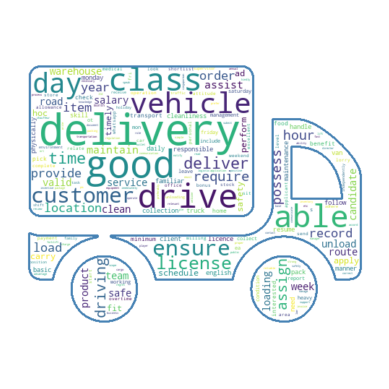

<Figure size 640x480 with 0 Axes>

In [10]:
# Read the whole text.
text = ' '.join(posts['job_desc_proc'])
# read the mask image
van_mask = np.array(Image.open('../Pictures/van.png'))

wc = WordCloud(background_color="white", max_words=200, mask=van_mask, collocations=False, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [11]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

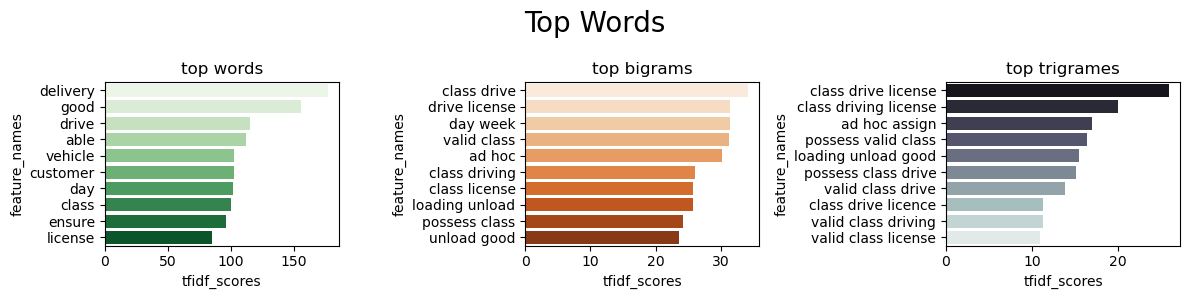

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'top words')

g2=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'top bigrams')

g3=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'top trigrames')

plt.suptitle('Top Words', fontsize=20)
plt.tight_layout()

In [13]:
posts.to_csv('../Data/8322_GoodsVehicleDriver_cleaned.csv', index=False) 

In [14]:
top_ngrams_df=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=1000)
top_ngrams_df

,feature_names,tfidf_scores
0,delivery,176.370195
1,good,155.232918
2,drive,114.632924
3,able,112.233313
4,vehicle,102.440073
...,...,...
995,neighborhood,2.818238
996,minor,2.812423
997,prs,2.811439
998,cream,2.800005


In [15]:
text = ' '.join(top_ngrams_df['feature_names'])
text

'delivery good drive able vehicle customer day class ensure license deliver time require assign item driving order possess hour warehouse assist location unload load provide salary maintain year loading product record week valid route road safe perform candidate carry ad hoc schedule clean timely service team licence daily fit van truck pack collection responsible food safety need familiar physically apply home cleanliness basic client handle english skill monday ot mon manner follow lorry resume benefit pick check working maintenance interested minimum transport management sit friday heavy saturday stock condition include start collect look attitude operation fri leave overtime car area weekend report ea willing whatsapp send complete store applicant office level month scope payment supervisor independently unloading bonus shift personal task cargo allowance relate family holiday incentive medical pm contact role receive prefer traffic player excellent relevant adhere position public 